In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score,
                             recall_score,
                             f1_score,
                             confusion_matrix,
                             classification_report,
                             ConfusionMatrixDisplay)

Я вирішив розглянути 2 різних вида вина окремо. Почну з білого

In [ ]:
df = pd.read_csv("wine+quality/winequality-white.csv", header=0)

In [ ]:
df.head()

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6                                                                                                                     
1  6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...                                                                                                                     
2  8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...                                                                                                                     
3  7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                                                                                     
4  7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...

In [ ]:
cols = df.columns[0].replace('"', '').split(";")

In [ ]:
rows = []

In [ ]:
for i, row in df.iterrows():
  r = row[0].split(';')
  rows.append(r)

In [ ]:
df_white = pd.DataFrame(rows, columns = cols)

In [ ]:
df_white.dropna()

fixed acidity volatile acidity citric acid residual sugar chlorides  \
0                7             0.27        0.36           20.7     0.045   
1              6.3              0.3        0.34            1.6     0.049   
2              8.1             0.28         0.4            6.9      0.05   
3              7.2             0.23        0.32            8.5     0.058   
4              7.2             0.23        0.32            8.5     0.058   
...            ...              ...         ...            ...       ...   
4893           6.2             0.21        0.29            1.6     0.039   
4894           6.6             0.32        0.36              8     0.047   
4895           6.5             0.24        0.19            1.2     0.041   
4896           5.5             0.29         0.3            1.1     0.022   
4897             6             0.21        0.38            0.8      0.02   

     free sulfur dioxide total sulfur dioxide  density    pH sulphates  \
0                     45                  170    1.001     3      0.45   
1                     14                  132    0.994   3.3      0.49   
2                     30                   97   0.9951  3.26      0.44   
3                     47                  186   0.9956  3.19       0.4   
4                     47                  186   0.9956  3.19       0.4   
...                  ...                  ...      ...   ...       ...   
4893                  24                   92  0.99114  3.27       0.5   
4894                  57                  168   0.9949  3.15      0.46   
4895                  30                  111  0.99254  2.99      0.46   
4896                  20                  110  0.98869  3.34      0.38   
4897                  22                   98  0.98941  3.26      0.32   

     alcohol quality  
0        8.8       6  
1        9.5       6  
2       10.1       6  
3        9.9       6  
4        9.9       6  
...      ...     ...  
4893    11.2       6  
4894     9.6       5  
4895     9.4       6  
4896    12.8       7  
4897    11.8       6  

[4898 rows x 12 columns]

In [ ]:
df_white.head()

fixed acidity volatile acidity citric acid residual sugar chlorides  \
0             7             0.27        0.36           20.7     0.045   
1           6.3              0.3        0.34            1.6     0.049   
2           8.1             0.28         0.4            6.9      0.05   
3           7.2             0.23        0.32            8.5     0.058   
4           7.2             0.23        0.32            8.5     0.058   

  free sulfur dioxide total sulfur dioxide density    pH sulphates alcohol  \
0                  45                  170   1.001     3      0.45     8.8   
1                  14                  132   0.994   3.3      0.49     9.5   
2                  30                   97  0.9951  3.26      0.44    10.1   
3                  47                  186  0.9956  3.19       0.4     9.9   
4                  47                  186  0.9956  3.19       0.4     9.9   

  quality  
0       6  
1       6  
2       6  
3       6  
4       6

In [ ]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed acidity         4898 non-null   object
 1   volatile acidity      4898 non-null   object
 2   citric acid           4898 non-null   object
 3   residual sugar        4898 non-null   object
 4   chlorides             4898 non-null   object
 5   free sulfur dioxide   4898 non-null   object
 6   total sulfur dioxide  4898 non-null   object
 7   density               4898 non-null   object
 8   pH                    4898 non-null   object
 9   sulphates             4898 non-null   object
 10  alcohol               4898 non-null   object
 11  quality               4898 non-null   object
dtypes: object(12)
memory usage: 459.3+ KB


In [ ]:
df_white = df_white.astype(float)

In [ ]:
df_white['dioxides'] = df_white['free sulfur dioxide']+df_white['total sulfur dioxide']
df_white['acidity'] = df_white['fixed acidity']+df_white['volatile acidity']

In [ ]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   float64
 12  dioxides              4898 non-null   float64
 13  acidity               4898 non-null   float64
dtypes: float64(14)
memory usage: 535.8 KB


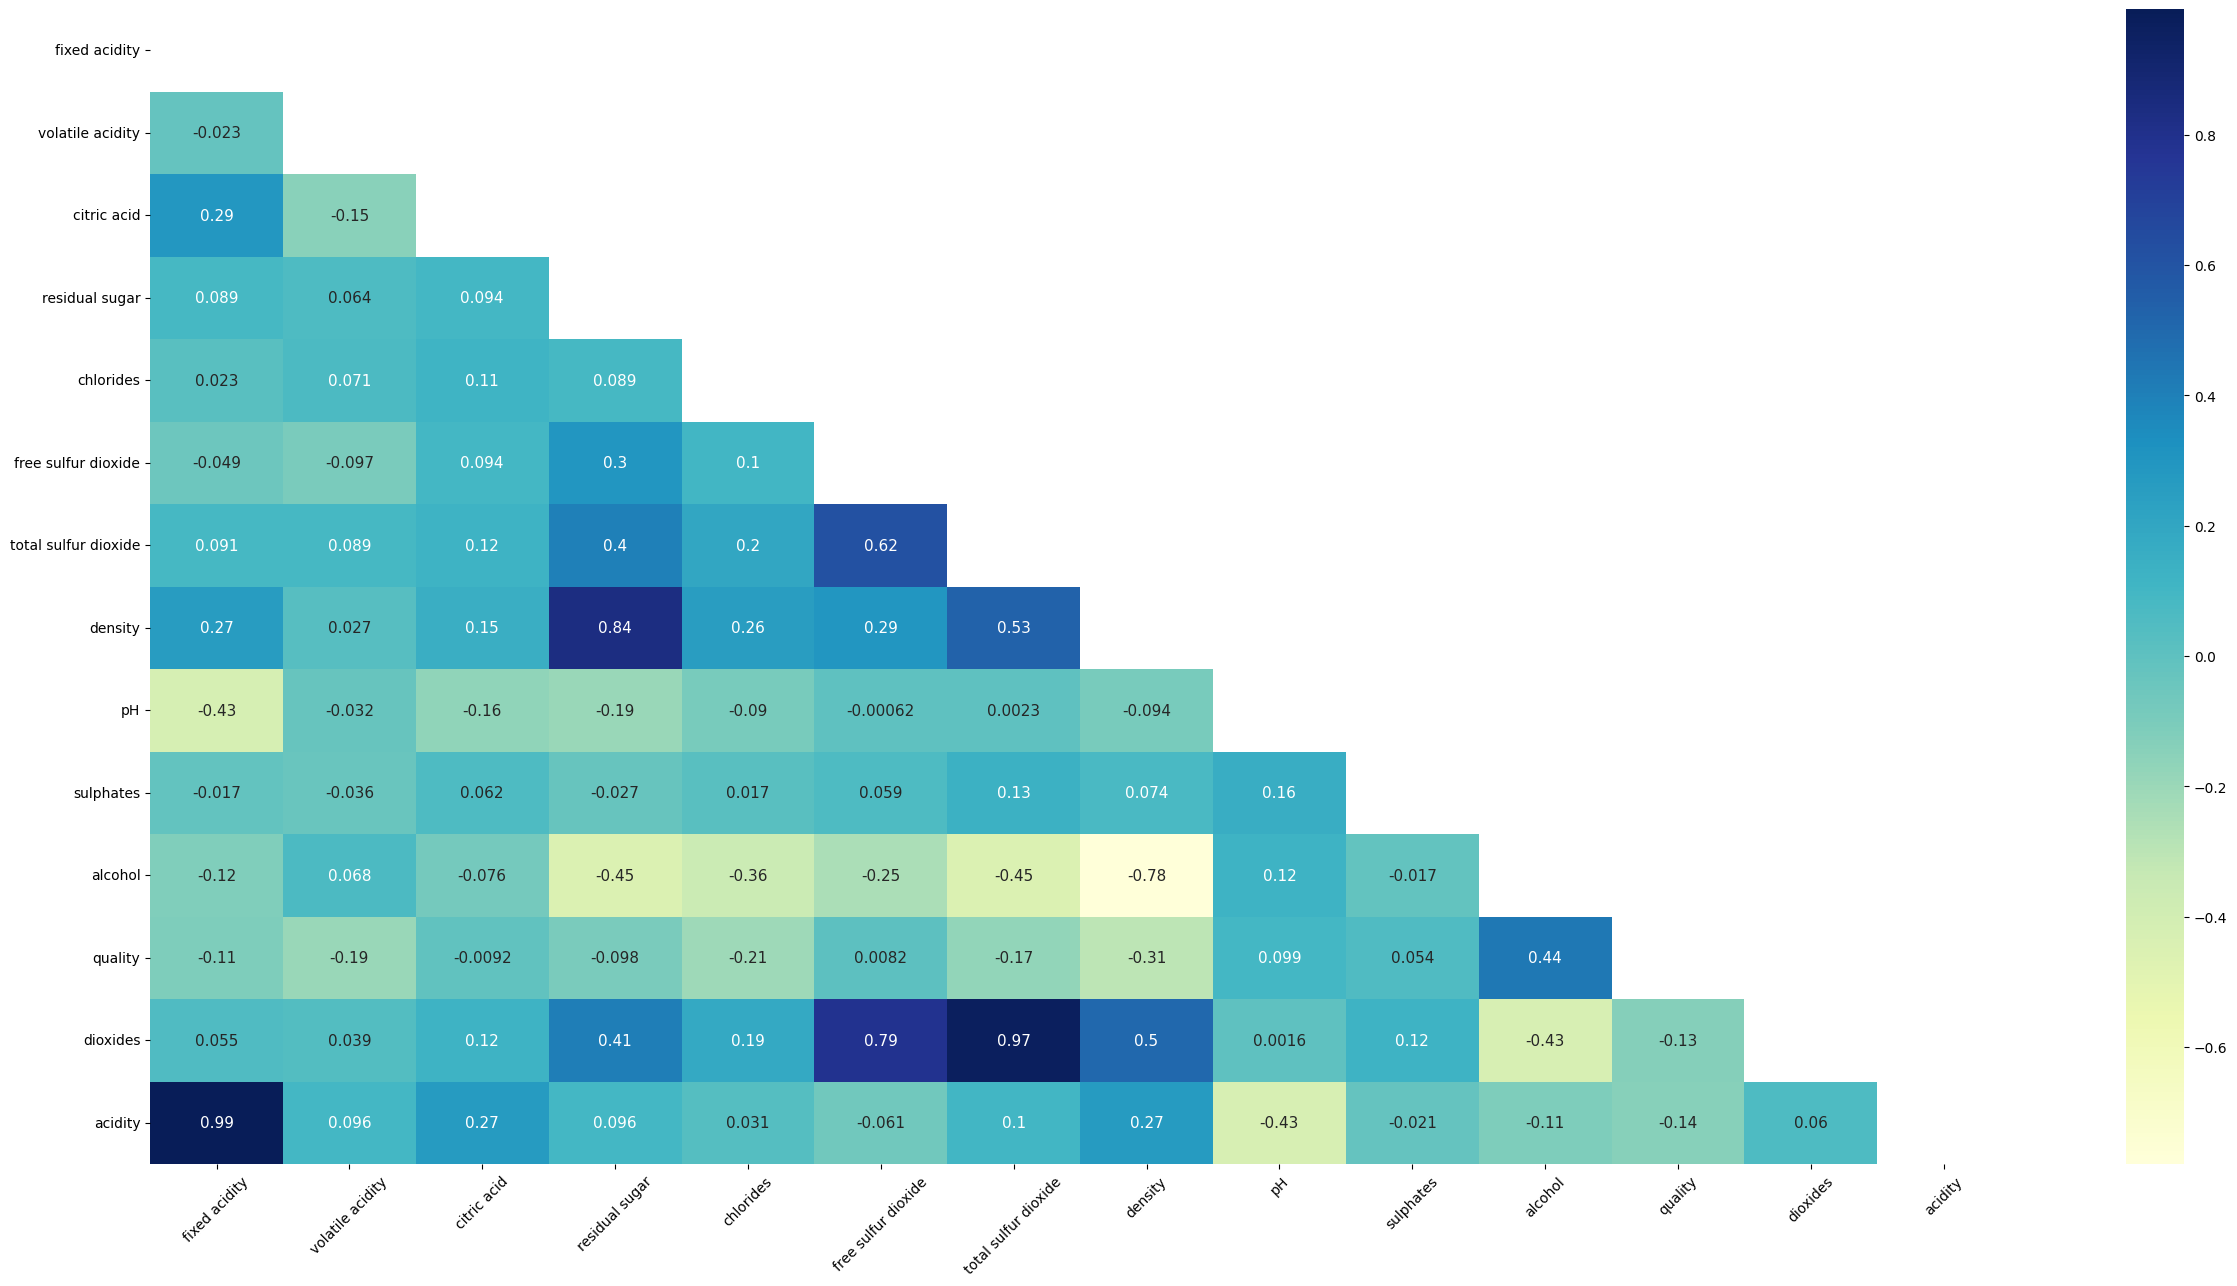

In [ ]:
corr_matrix = df_white.corr()
plt.figure(figsize=(30, 15))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"fontsize":11}, mask=mask)
plt.xticks(rotation=45)
plt.show()

Through the heatmap, we saw the dependence of features on each other



In [ ]:
corr_matrix.head()

fixed acidity  volatile acidity  citric acid  \
fixed acidity          1.000000         -0.022697     0.289181   
volatile acidity      -0.022697          1.000000    -0.149472   
citric acid            0.289181         -0.149472     1.000000   
residual sugar         0.089021          0.064286     0.094212   
chlorides              0.023086          0.070512     0.114364   

                  residual sugar  chlorides  free sulfur dioxide  \
fixed acidity           0.089021   0.023086            -0.049396   
volatile acidity        0.064286   0.070512            -0.097012   
citric acid             0.094212   0.114364             0.094077   
residual sugar          1.000000   0.088685             0.299098   
chlorides               0.088685   1.000000             0.101392   

                  total sulfur dioxide   density        pH  sulphates  \
fixed acidity                 0.091070  0.265331 -0.425858  -0.017143   
volatile acidity              0.089261  0.027114 -0.031915  -0.035728   
citric acid                   0.121131  0.149503 -0.163748   0.062331   
residual sugar                0.401439  0.838966 -0.194133  -0.026664   
chlorides                     0.198910  0.257211 -0.090439   0.016763   

                   alcohol   quality  dioxides   acidity  
fixed acidity    -0.120881 -0.113663  0.055462  0.992908  
volatile acidity  0.067718 -0.194723  0.039233  0.096321  
citric acid      -0.075729 -0.009209  0.123505  0.270135  
residual sugar   -0.450631 -0.097577  0.405361  0.096274  
chlorides        -0.360189 -0.209934  0.186283  0.031369

In [ ]:
df_white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'dioxides', 'acidity'],
      dtype='object')

In [ ]:
corr_with_quality = corr_matrix['quality'].sort_values(ascending=False, key = lambda x: abs(x)).to_frame()
corr_with_quality.drop('quality')

quality
alcohol               0.435575
density              -0.307123
chlorides            -0.209934
volatile acidity     -0.194723
total sulfur dioxide -0.174737
acidity              -0.136320
dioxides             -0.133379
fixed acidity        -0.113663
pH                    0.099427
residual sugar       -0.097577
sulphates             0.053678
citric acid          -0.009209
free sulfur dioxide   0.008158

In [ ]:
top_features = corr_with_quality[abs(corr_with_quality.quality) > 0.05].index.tolist()

In [ ]:
X = df_white[top_features[1:]]
y = df_white.quality

In [ ]:
X_train, X_test = train_test_split(X.index, test_size=.3, random_state=42, stratify=y)

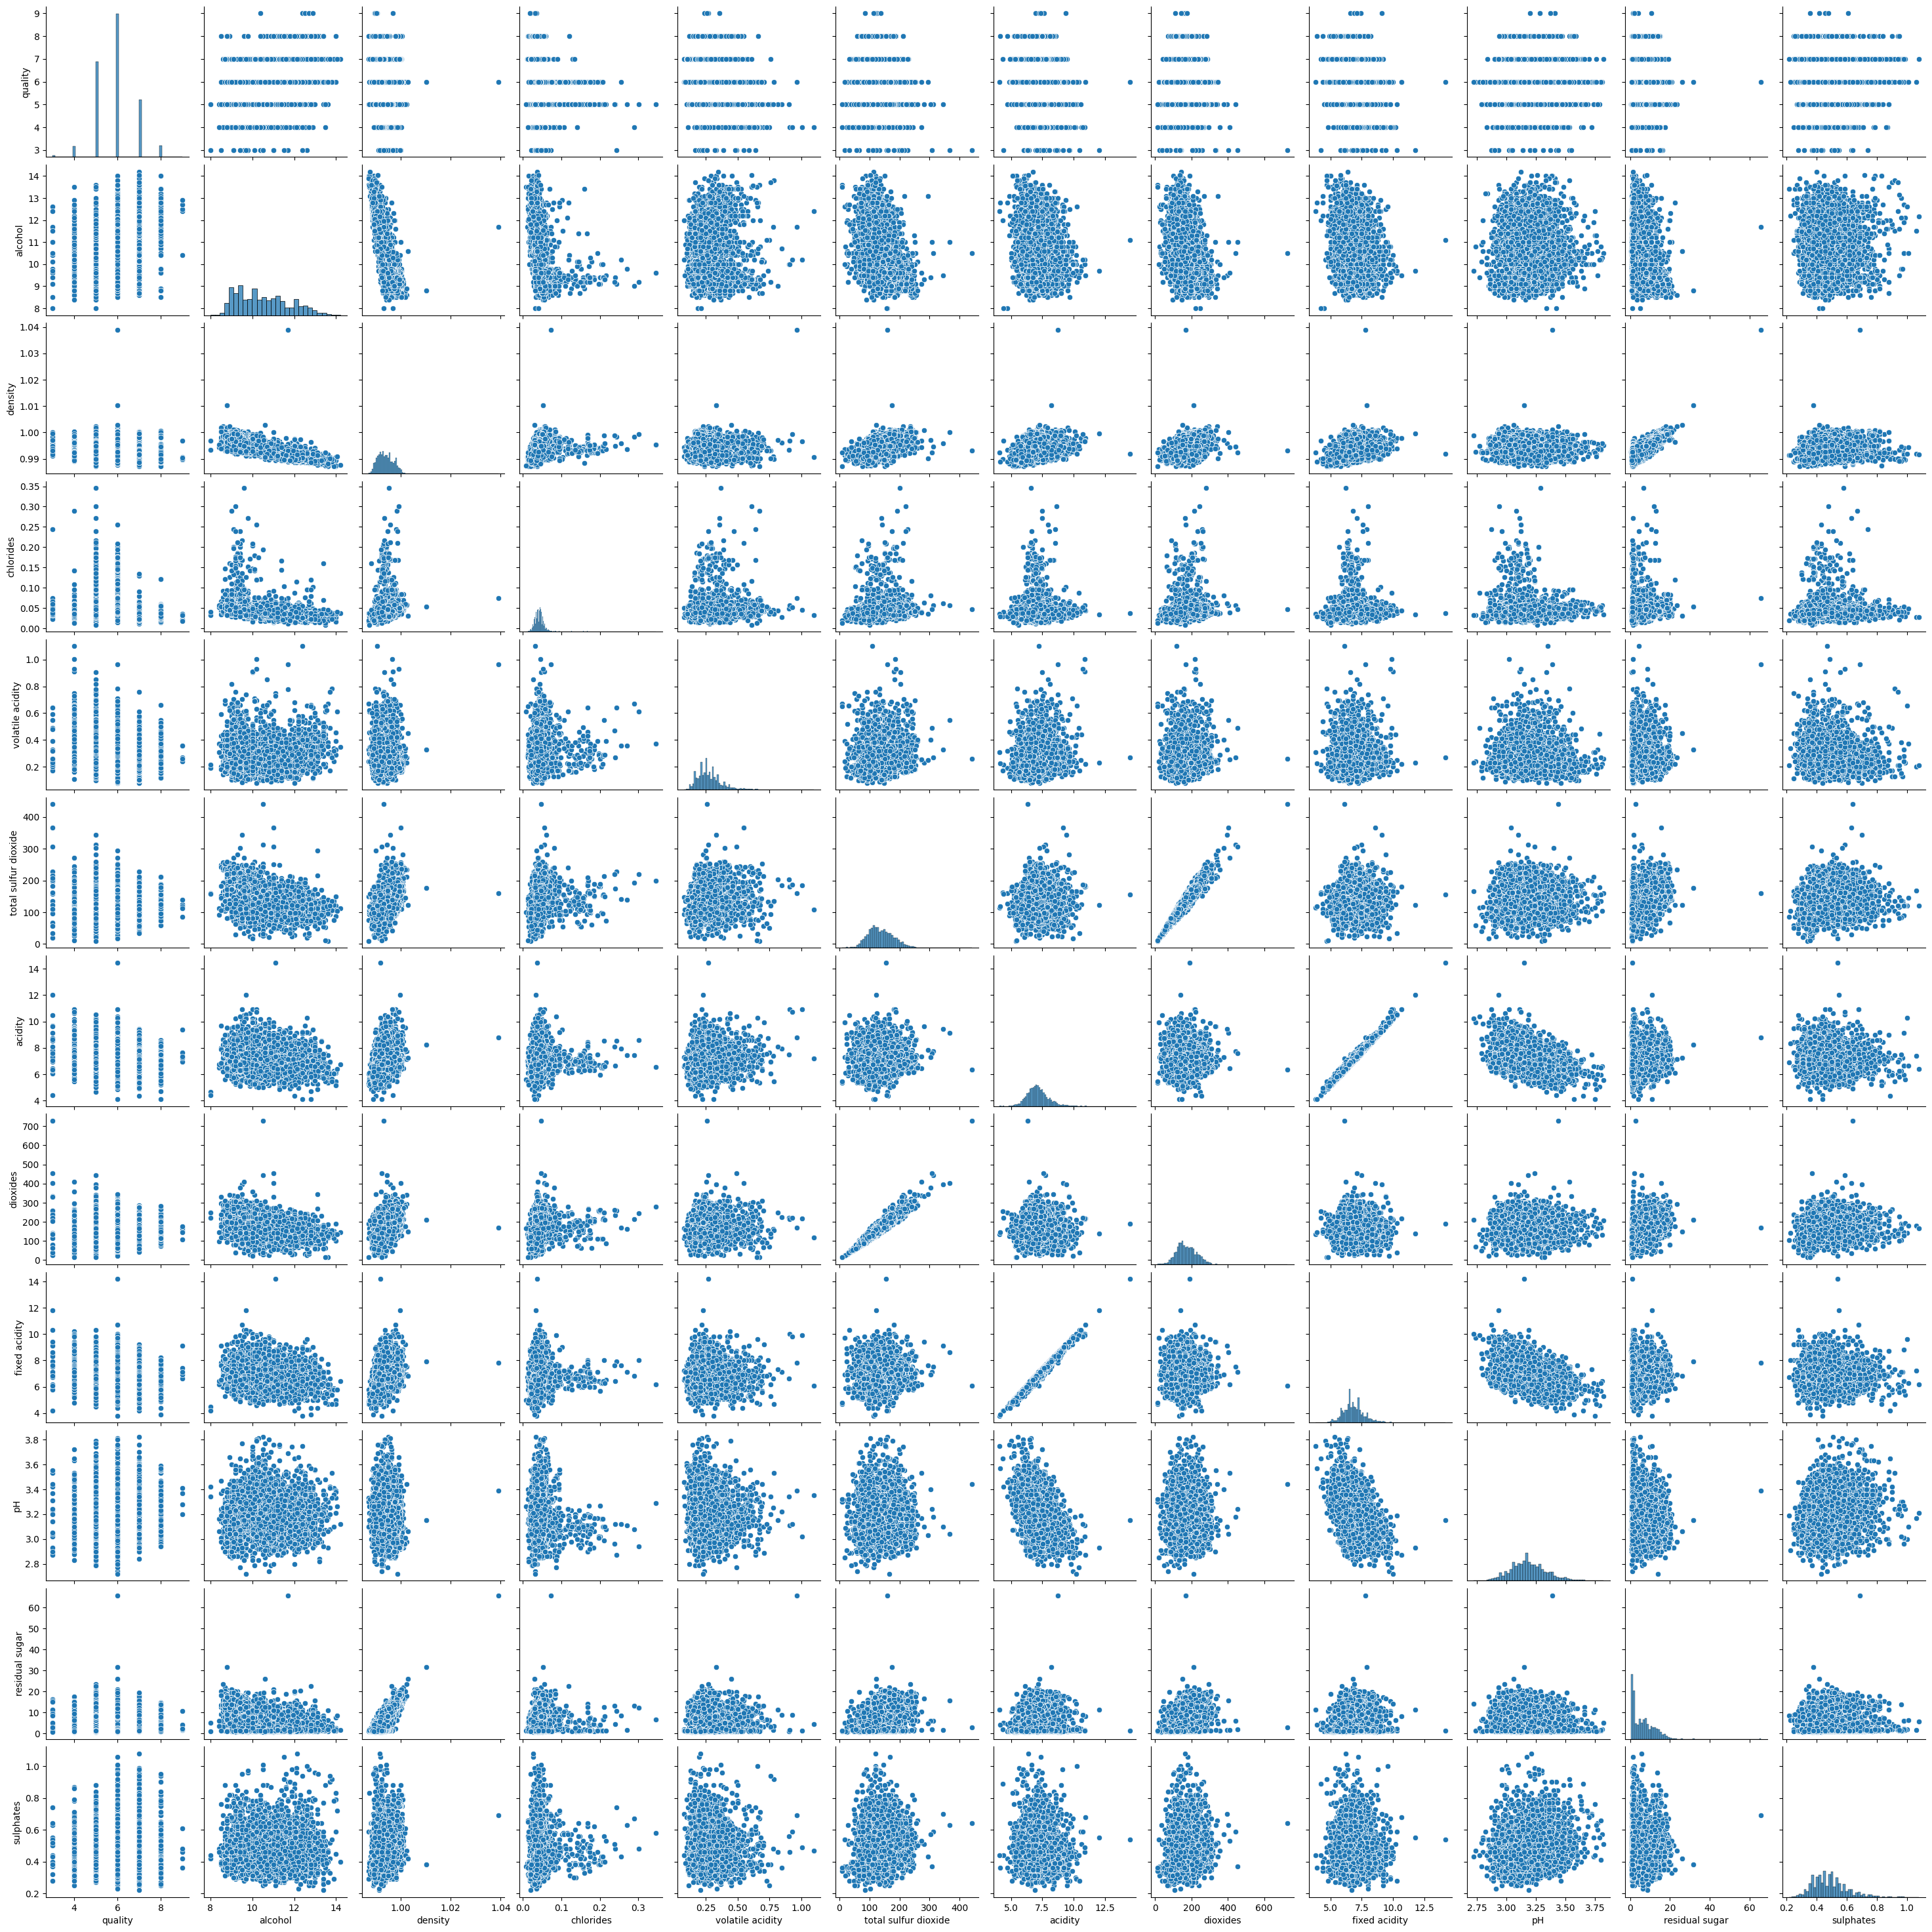

In [ ]:
sns.pairplot(data = df_white[top_features])

The distribution is more or less symmetrical, but there are a lot of outliers, so I will use RobustScaler

In [ ]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X.loc[X_train])
X_test_scaled = scaler.transform(X.loc[X_test])

In [ ]:
reg = LinearRegression()
mse_cv_scores_train = cross_val_score(estimator = reg, X = X_train_scaled, y = y[X_train], cv = 5, scoring='neg_mean_squared_error')
rmse_cv_scores_train = cross_val_score(estimator = reg, X = X_train_scaled, y = y[X_train], cv = 5, scoring='neg_root_mean_squared_error')

mse_cv_scores_test = cross_val_score(estimator = reg, X = X_test_scaled, y = y[X_test], cv = 5, scoring='neg_mean_squared_error')
rmse_cv_scores_test = cross_val_score(estimator = reg, X = X_test_scaled, y = y[X_test], cv = 5, scoring='neg_root_mean_squared_error')

reg.fit(X_train_scaled, y[X_train])
train_score = reg.score(X_train_scaled, y[X_train])
test_score = reg.score(X_test_scaled, y[X_test])
print(' MSE CV scores for training set:', -mse_cv_scores_train, '\n', 'RMSE CV scores for training set:', -rmse_cv_scores_train, '\n',' MSE CV scores for testing set:', -mse_cv_scores_test, '\n', 'RMSE CV scores for testing set:', -rmse_cv_scores_test, '\n','Train score:', train_score, '\n', 'Test score:', test_score,)


 MSE CV scores for training set: [0.51705596 0.62577155 0.57662083 0.55766524 0.55471704] 
 RMSE CV scores for training set: [0.71906603 0.79105723 0.75935554 0.74676987 0.74479329] 
  MSE CV scores for testing set: [0.69945323 0.53093146 0.56432356 0.56202941 0.56040836] 
 RMSE CV scores for testing set: [0.8363332  0.72865044 0.75121472 0.74968621 0.74860428] 
 Train score: 0.2896728450585224 
 Test score: 0.2620982096554395


In [ ]:
elastic_net = ElasticNet()
param_grid = {
    'alpha': np.linspace(0.001, 2, 100),
    'l1_ratio': np.linspace(0.001, .99, 10),
}
grid_search = GridSearchCV(elastic_net, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train_scaled, y[X_train])
best_model = grid_search.best_estimator_
print("Best Model:", best_model)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.761e+02, tolerance: 2.213e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.829e+02, tolerance: 2.107e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.413e+02, tolerance: 2.130e

Best Model: ElasticNet(alpha=0.021191919191919192, l1_ratio=0.001)


In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  mse_train = mean_squared_error(y_train, y_train_pred)
  rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

  mse_test = mean_squared_error(y_test, y_test_pred)
  rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

  return {
        "MSE Train": round(mse_train, 3),
        "MSE Test": round(mse_test, 3),
        "RMSE Train": round(rmse_train, 3),
        "RMSE Test": round(rmse_test, 3)
    }

In [ ]:
evaluate_model(best_model, X_train_scaled, X_test_scaled, y[X_train], y[X_test])

{'MSE Train': 0.561,
 'MSE Test': 0.581,
 'RMSE Train': 0.749,
 'RMSE Test': 0.762}

We see that regularization in this case did not help to improve the situation, but it is designed to prevent overfitting, so if this issue was not there, it is ok

Now we work with red wine

In [ ]:
df = pd.read_csv("wine+quality/winequality-red.csv", header=0)

In [ ]:
cols = df.columns[0].replace('"', '').split(';')

In [ ]:
rows = []
for i, row in df.iterrows():
  rows.append(row[0].split(';'))

In [ ]:
df_red = pd.DataFrame(data = rows, columns=cols)

In [ ]:
df_red.head()

fixed acidity volatile acidity citric acid residual sugar chlorides  \
0           7.4              0.7           0            1.9     0.076   
1           7.8             0.88           0            2.6     0.098   
2           7.8             0.76        0.04            2.3     0.092   
3          11.2             0.28        0.56            1.9     0.075   
4           7.4              0.7           0            1.9     0.076   

  free sulfur dioxide total sulfur dioxide density    pH sulphates alcohol  \
0                  11                   34  0.9978  3.51      0.56     9.4   
1                  25                   67  0.9968   3.2      0.68     9.8   
2                  15                   54   0.997  3.26      0.65     9.8   
3                  17                   60   0.998  3.16      0.58     9.8   
4                  11                   34  0.9978  3.51      0.56     9.4   

  quality  
0       5  
1       5  
2       5  
3       6  
4       5

In [ ]:
df_red = df_red.dropna()

In [ ]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed acidity         1599 non-null   object
 1   volatile acidity      1599 non-null   object
 2   citric acid           1599 non-null   object
 3   residual sugar        1599 non-null   object
 4   chlorides             1599 non-null   object
 5   free sulfur dioxide   1599 non-null   object
 6   total sulfur dioxide  1599 non-null   object
 7   density               1599 non-null   object
 8   pH                    1599 non-null   object
 9   sulphates             1599 non-null   object
 10  alcohol               1599 non-null   object
 11  quality               1599 non-null   object
dtypes: object(12)
memory usage: 150.0+ KB


In [ ]:
df_red = df_red.astype('float')

In [ ]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [ ]:
df_red['dioxides'] = df_red['free sulfur dioxide']+df_red['total sulfur dioxide']
df_red['acidity'] = df_red['fixed acidity']+df_red['volatile acidity']

In [ ]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
 12  dioxides              1599 non-null   float64
 13  acidity               1599 non-null   float64
dtypes: float64(14)
memory usage: 175.0 KB


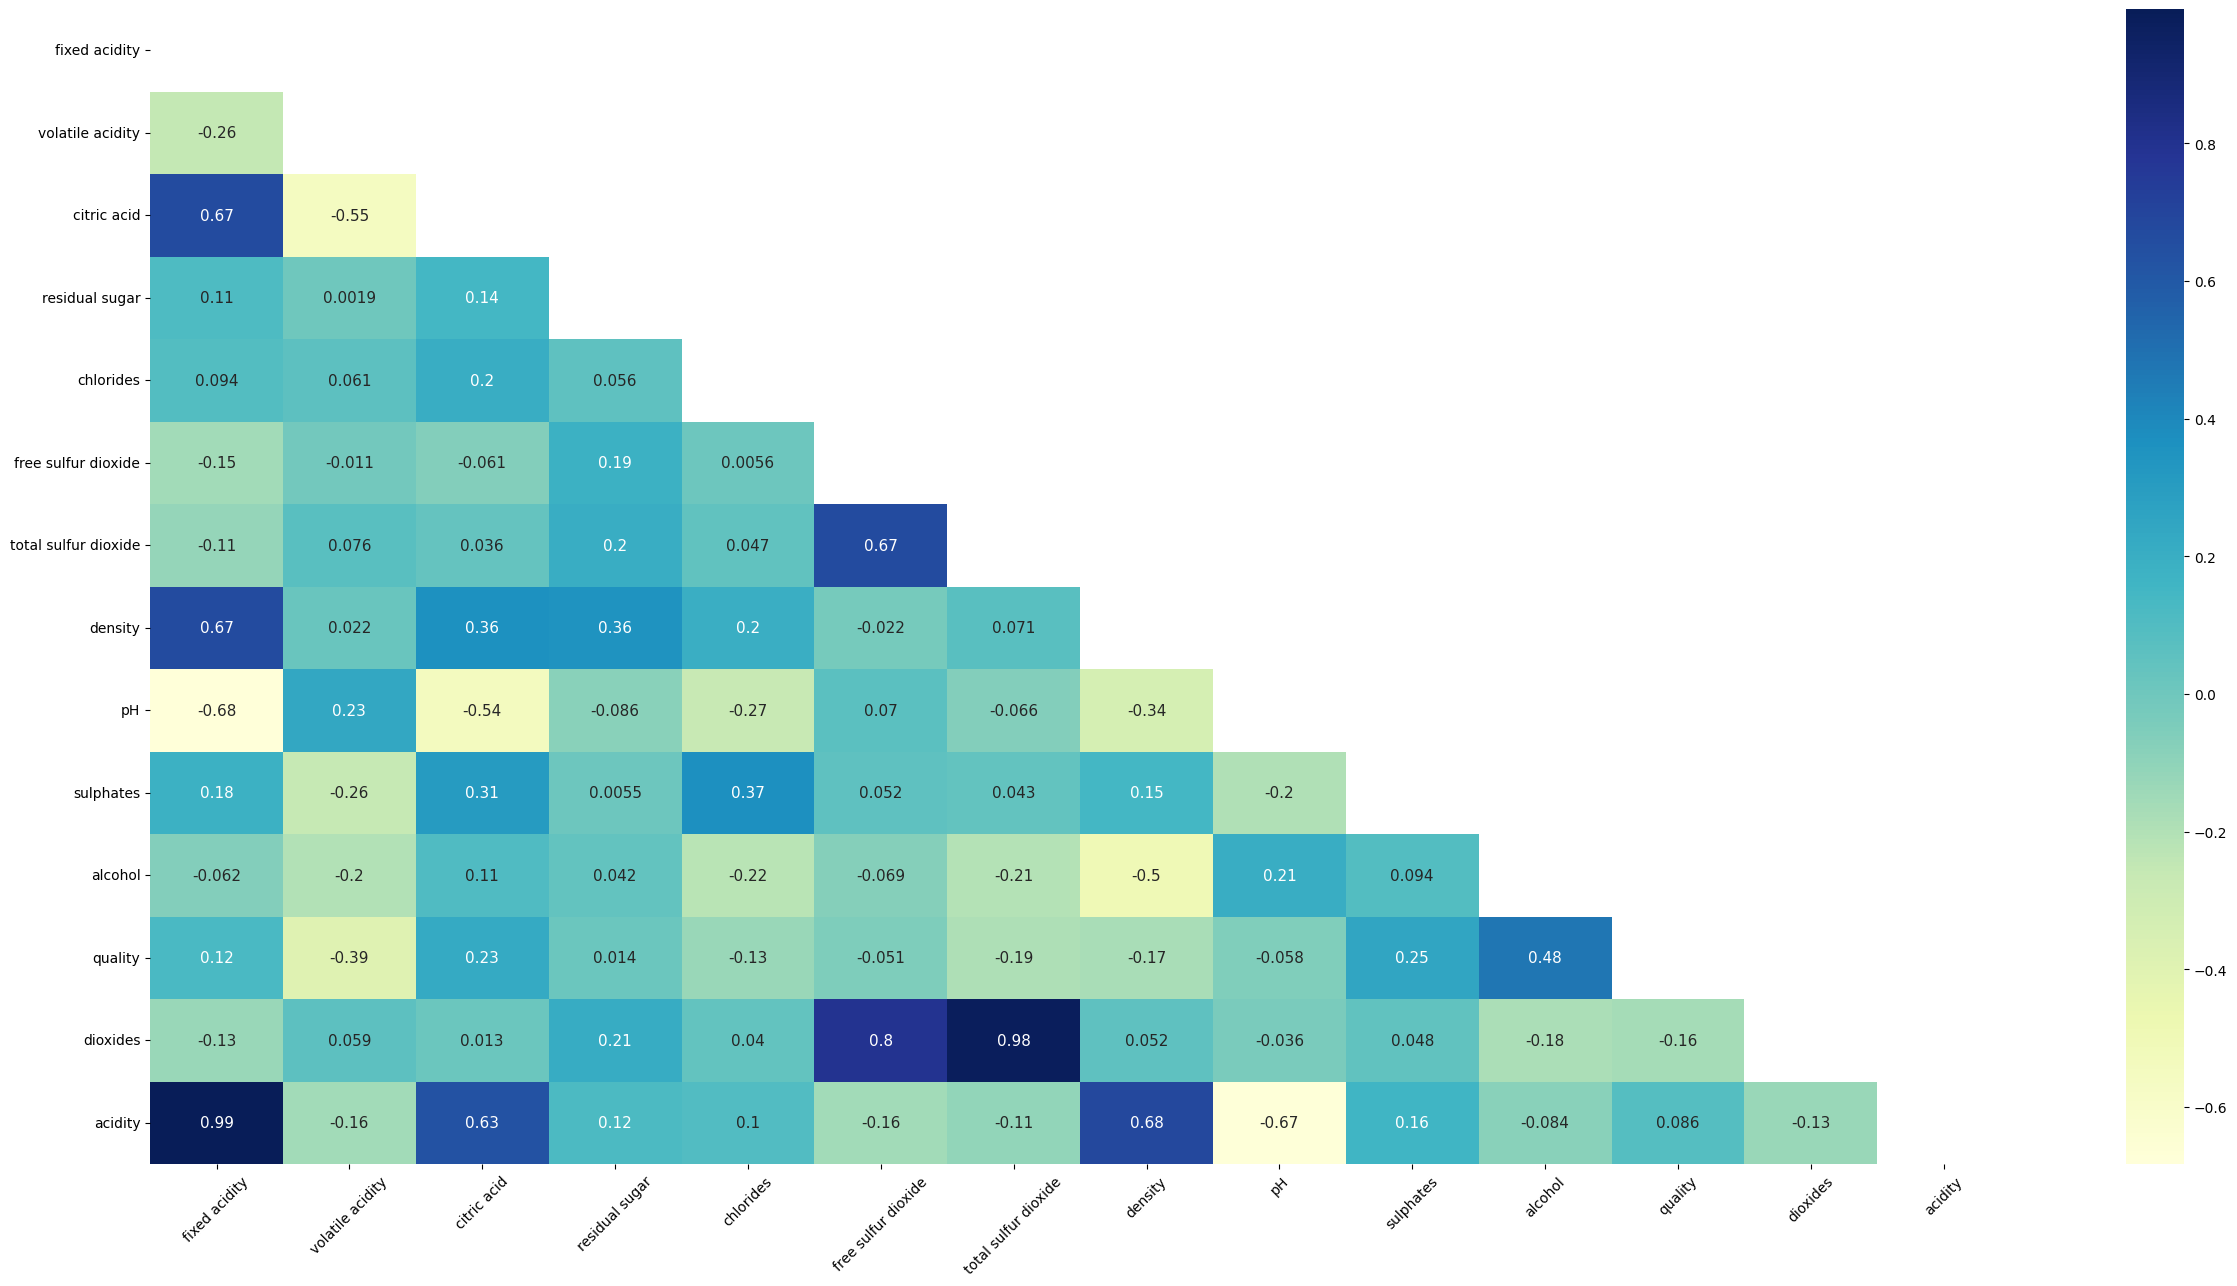

In [ ]:
corr_matrix = df_red.corr()
plt.figure(figsize=(30, 15))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"fontsize":11}, mask=mask)
plt.xticks(rotation=45)
plt.show()

Through the heatmap, we saw the dependence of features on each other


In [ ]:
corr_with_quality = corr_matrix['quality'].sort_values(ascending=False, key = lambda x: abs(x)).to_frame()
corr_with_quality.drop('quality')

quality
alcohol               0.476166
volatile acidity     -0.390558
sulphates             0.251397
citric acid           0.226373
total sulfur dioxide -0.185100
density              -0.174919
dioxides             -0.162895
chlorides            -0.128907
fixed acidity         0.124052
acidity               0.085709
pH                   -0.057731
free sulfur dioxide  -0.050656
residual sugar        0.013732

In [ ]:
top_features = corr_with_quality[abs(corr_with_quality.quality) > 0.05].index.tolist()
X = df_red[top_features[1:]]
y = df_red.quality

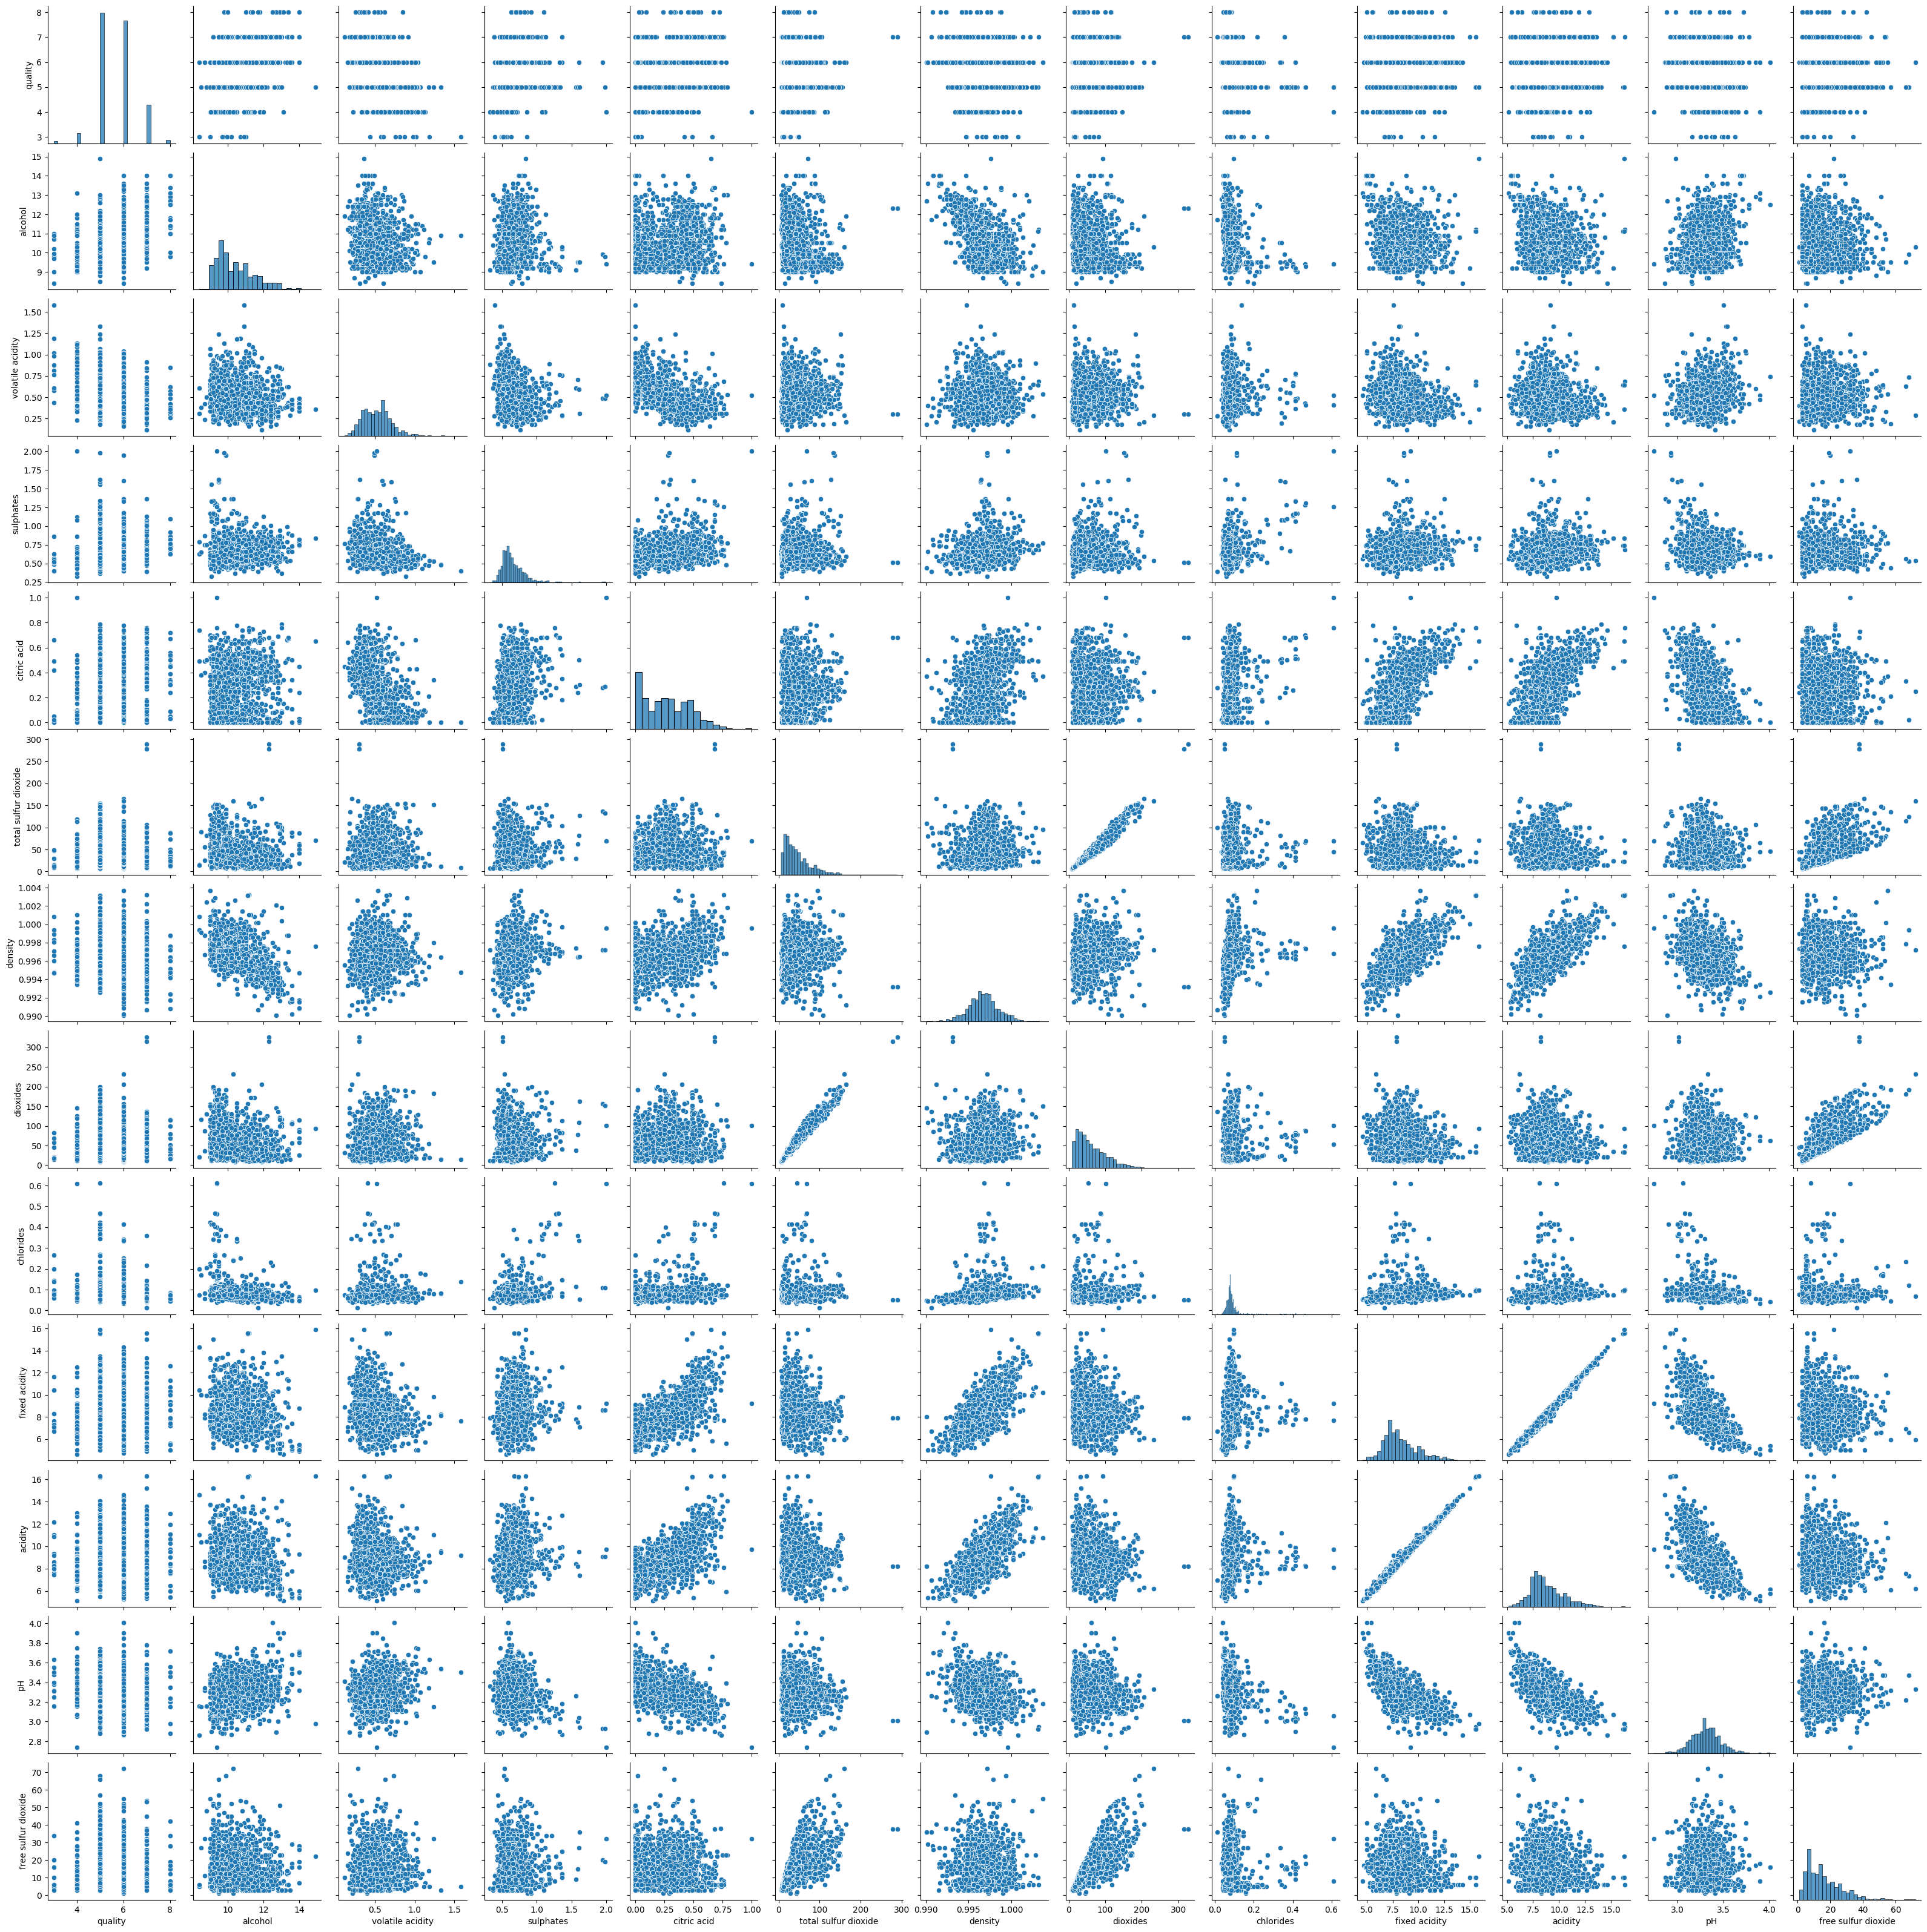

In [ ]:
sns.pairplot(data = df_red[top_features])

The distribution is asymmetric, so we use StandardScaler here

In [ ]:
X_train, X_test = train_test_split(X.index, test_size=.3, random_state=42, stratify=y)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X.loc[X_train])
X_test_scaled = scaler.transform(X.loc[X_test])


In [ ]:
reg = LinearRegression()
mse_cv_scores_train = cross_val_score(estimator = reg, X = X_train_scaled, y = y[X_train], cv = 5, scoring='neg_mean_squared_error')
rmse_cv_scores_train = cross_val_score(estimator = reg, X = X_train_scaled, y = y[X_train], cv = 5, scoring='neg_root_mean_squared_error')

mse_cv_scores_test = cross_val_score(estimator = reg, X = X_test_scaled, y = y[X_test], cv = 5, scoring='neg_mean_squared_error')
rmse_cv_scores_test = cross_val_score(estimator = reg, X = X_test_scaled, y = y[X_test], cv = 5, scoring='neg_root_mean_squared_error')

reg.fit(X_train_scaled, y[X_train])
train_score = reg.score(X_train_scaled, y[X_train])
test_score = reg.score(X_test_scaled, y[X_test])
print(' MSE CV scores for training set:', -mse_cv_scores_train, '\n', 'RMSE CV scores for training set:', -rmse_cv_scores_train, '\n',' MSE CV scores for testing set:', -mse_cv_scores_test, '\n', 'RMSE CV scores for testing set:', -rmse_cv_scores_test, '\n','Train score:', train_score, '\n', 'Test score:', test_score,)


 MSE CV scores for training set: [0.42112774 0.37382183 0.44678985 0.41316152 0.52346185] 
 RMSE CV scores for training set: [0.64894356 0.6114097  0.66842341 0.64277641 0.72350663] 
  MSE CV scores for testing set: [0.49172047 0.34766158 0.3664358  0.5420865  0.33274146] 
 RMSE CV scores for testing set: [0.70122783 0.58962834 0.60533941 0.73626524 0.57683746] 
 Train score: 0.3513698002231761 
 Test score: 0.37123539458475063


In [ ]:
elastic_net = ElasticNet()
param_grid = {
    'alpha': np.linspace(0.001, 2, 100),
    'l1_ratio': np.linspace(0.001, .99, 10),
}
grid_search = GridSearchCV(elastic_net, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train_scaled, y[X_train])
best_model = grid_search.best_estimator_
print("Best Model:", best_model)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.626e+02, tolerance: 5.675e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.714e+02, tolerance: 5.998e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.633e+02, tolerance: 6.035e

Best Model: ElasticNet(alpha=0.021191919191919192, l1_ratio=0.11088888888888888)


In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  mse_train = mean_squared_error(y_train, y_train_pred)
  rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

  mse_test = mean_squared_error(y_test, y_test_pred)
  rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

  return {
        "MSE Train": round(mse_train, 3),
        "MSE Test": round(mse_test, 3),
        "RMSE Train": round(rmse_train, 3),
        "RMSE Test": round(rmse_test, 3)
    }

In [ ]:
evaluate_model(best_model, X_train_scaled, X_test_scaled, y[X_train], y[X_test])

{'MSE Train': 0.424,
 'MSE Test': 0.405,
 'RMSE Train': 0.651,
 'RMSE Test': 0.637}

We see that regularization in this case did not help to improve the situation, but it is designed to prevent overfitting, so if this issue was not there, it is ok